In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [2]:
def load_data():
    train_data = datasets.FashionMNIST(root='./dataset/FashionMNIST/', train=True, download=True)
    test_data = datasets.FashionMNIST(root='./dataset/FashionMNIST/', train=False, download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading FashionMNIST train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading FashionMNIST test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [3]:
X_train, y_train, X_val, y_val = load_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Loading FashionMNIST test data: 100%|██████████████████████| 10000/10000 [00:00<00:00, 20815.22it/s]


Number of training samples: 60000 
Number of test samples: 10000 
Classes: [0 1 2 3 4 5 6 7 8 9]
Train Class Distribution: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
Test Class Distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [4]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=392
entrySize=784
input_addr_length=2


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:17<00:00, 585.03it/s]


Accuracy:   0.15
Total Training Execution Time: 76.16 seconds


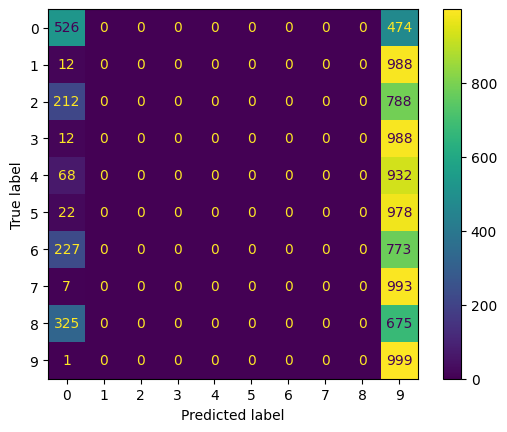

num_of_htables=196
entrySize=784
input_addr_length=4


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:10<00:00, 947.77it/s]


Accuracy:   0.31
Total Training Execution Time: 49.68 seconds


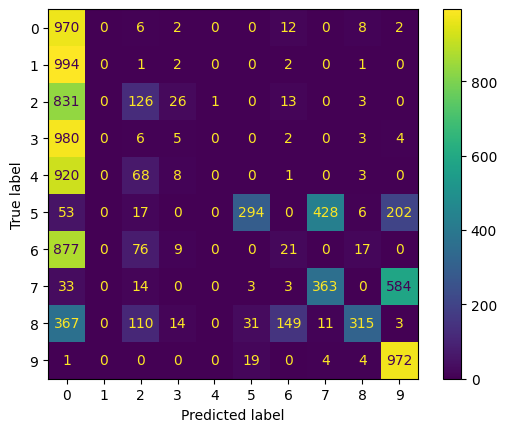

num_of_htables=130
entrySize=784
input_addr_length=6


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1171.83it/s]


Accuracy:   0.59
Total Training Execution Time: 38.98 seconds


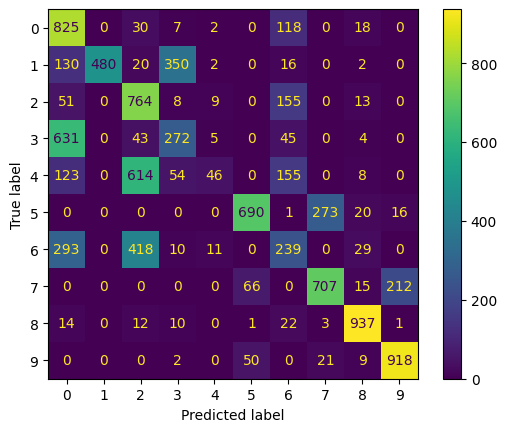

num_of_htables=98
entrySize=784
input_addr_length=8


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1215.69it/s]


Accuracy:   0.78
Total Training Execution Time: 35.50 seconds


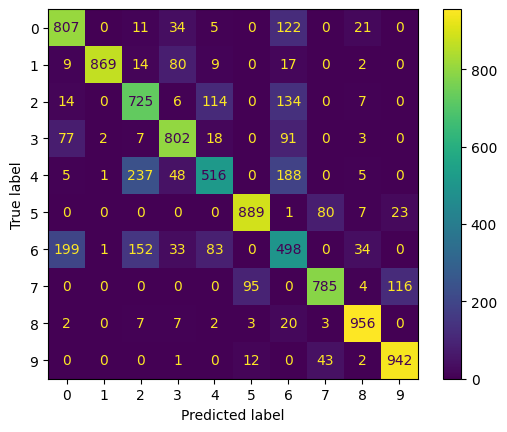

num_of_htables=78
entrySize=784
input_addr_length=10


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1270.75it/s]


Accuracy:   0.81
Total Training Execution Time: 33.81 seconds


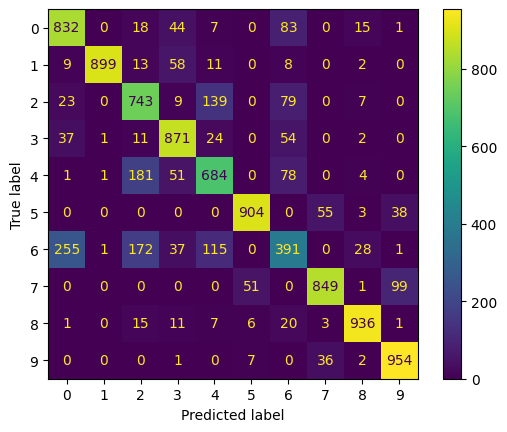

num_of_htables=65
entrySize=784
input_addr_length=12


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1289.94it/s]


Accuracy:   0.79
Total Training Execution Time: 33.79 seconds


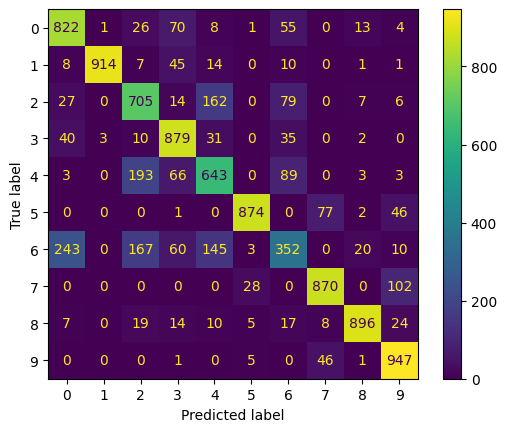

num_of_htables=56
entrySize=784
input_addr_length=14


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1401.05it/s]


Accuracy:   0.77
Total Training Execution Time: 33.38 seconds


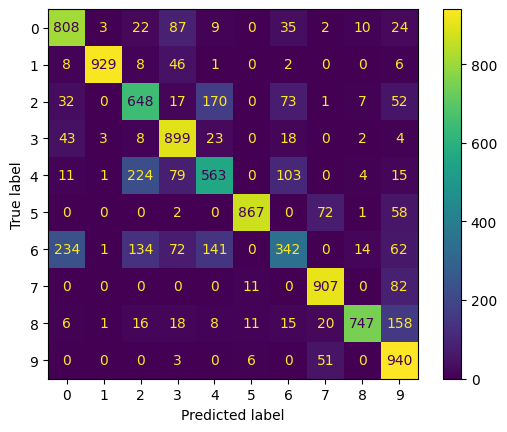

num_of_htables=49
entrySize=784
input_addr_length=16


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1507.62it/s]


Accuracy:   0.72
Total Training Execution Time: 32.81 seconds


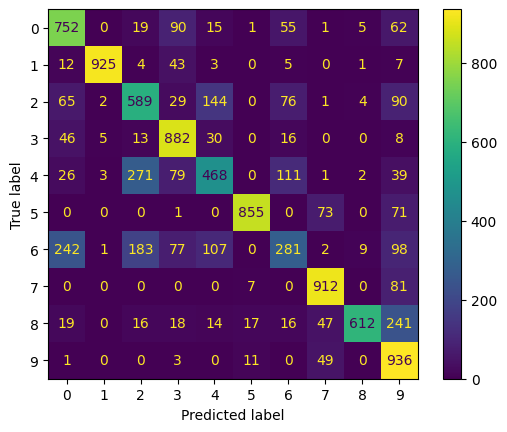

num_of_htables=43
entrySize=784
input_addr_length=18


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1543.85it/s]


Accuracy:   0.62
Total Training Execution Time: 31.89 seconds


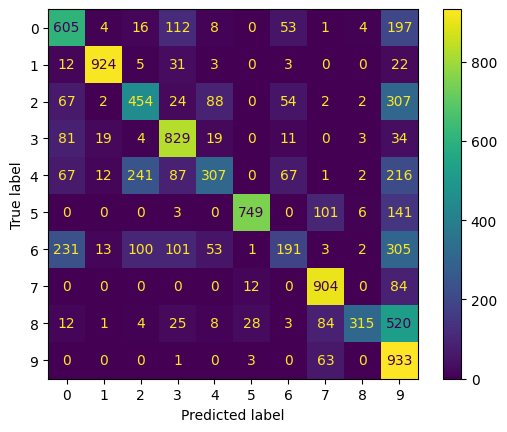

num_of_htables=39
entrySize=784
input_addr_length=20


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1551.12it/s]


Accuracy:   0.54
Total Training Execution Time: 32.81 seconds


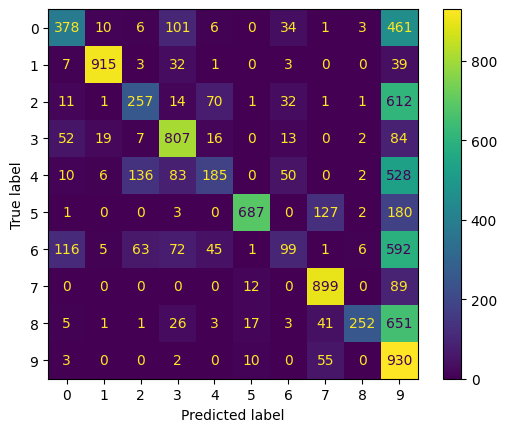

num_of_htables=35
entrySize=784
input_addr_length=22


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1603.32it/s]


Accuracy:   0.44
Total Training Execution Time: 31.42 seconds


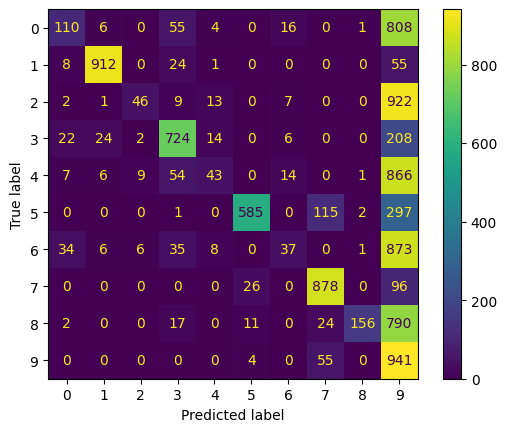

num_of_htables=32
entrySize=784
input_addr_length=24


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1657.36it/s]


Accuracy:   0.41
Total Training Execution Time: 31.52 seconds


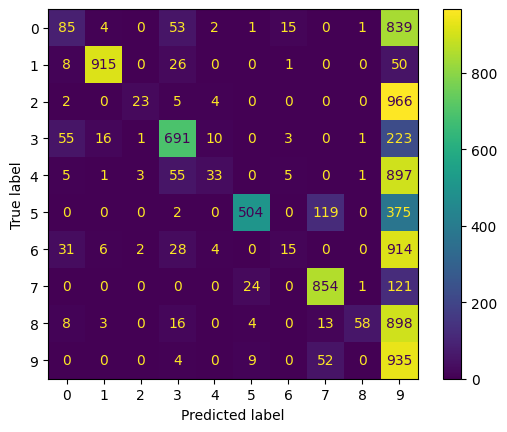

num_of_htables=30
entrySize=784
input_addr_length=26


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1651.67it/s]


Accuracy:   0.37
Total Training Execution Time: 31.15 seconds


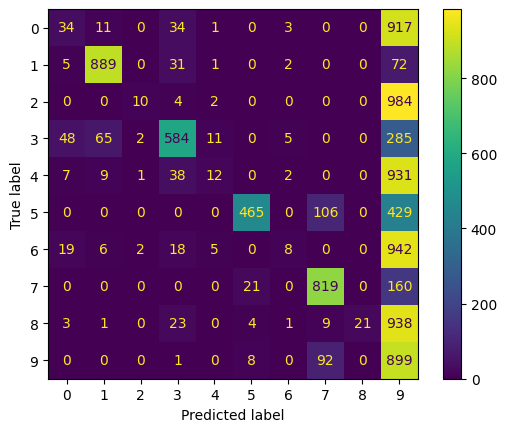

num_of_htables=28
entrySize=784
input_addr_length=28


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1687.56it/s]


Accuracy:   0.33
Total Training Execution Time: 30.58 seconds


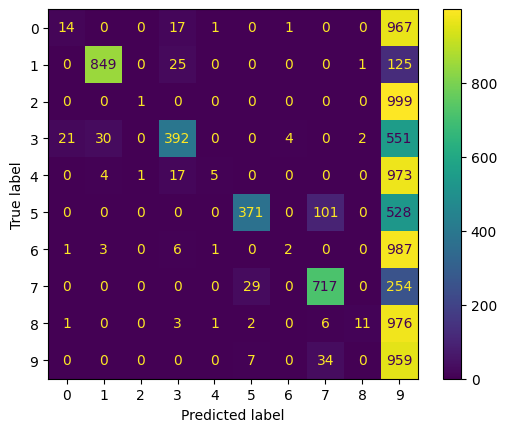

num_of_htables=26
entrySize=784
input_addr_length=30


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1741.37it/s]


Accuracy:   0.32
Total Training Execution Time: 31.33 seconds


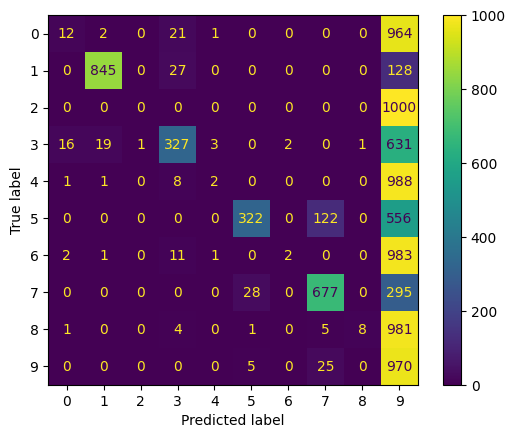

num_of_htables=24
entrySize=784
input_addr_length=32


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1821.32it/s]


Accuracy:   0.26
Total Training Execution Time: 30.30 seconds


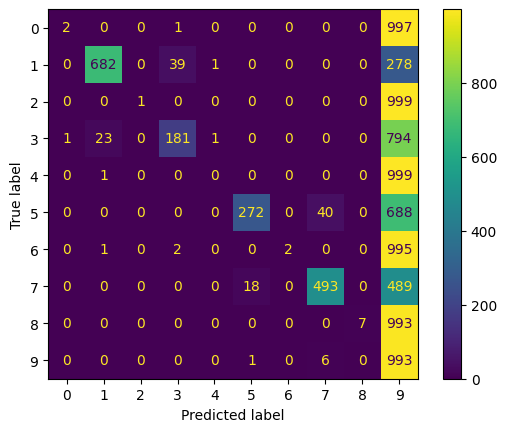

num_of_htables=23
entrySize=784
input_addr_length=34


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1740.51it/s]


Accuracy:   0.26
Total Training Execution Time: 30.48 seconds


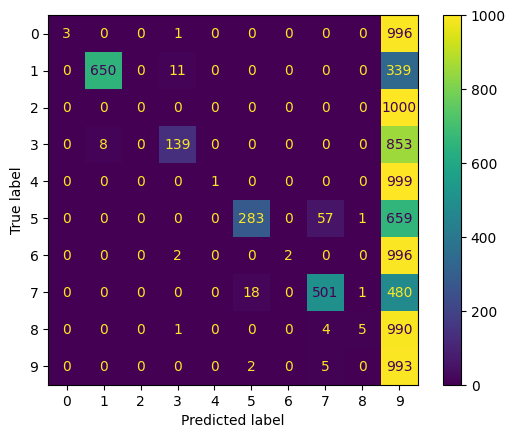

num_of_htables=21
entrySize=784
input_addr_length=36


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1848.03it/s]


Accuracy:   0.21
Total Training Execution Time: 29.15 seconds


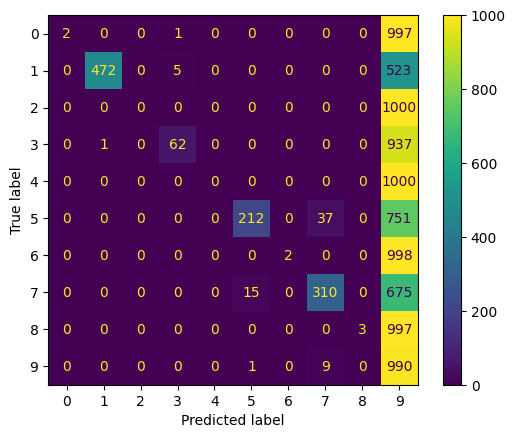

num_of_htables=20
entrySize=784
input_addr_length=38


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1896.79it/s]


Accuracy:   0.17
Total Training Execution Time: 29.45 seconds


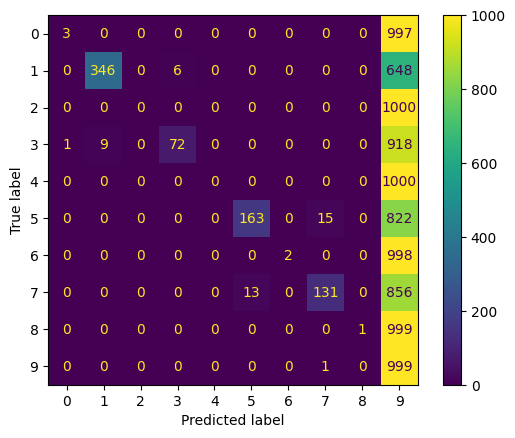

num_of_htables=19
entrySize=784
input_addr_length=40


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1870.90it/s]


Accuracy:   0.17
Total Training Execution Time: 29.41 seconds


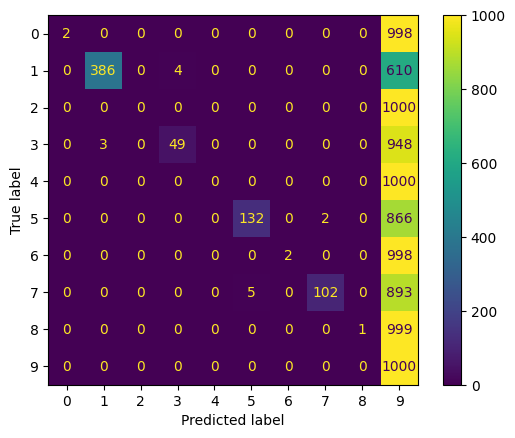

num_of_htables=18
entrySize=784
input_addr_length=42


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1887.20it/s]


Accuracy:   0.13
Total Training Execution Time: 29.06 seconds


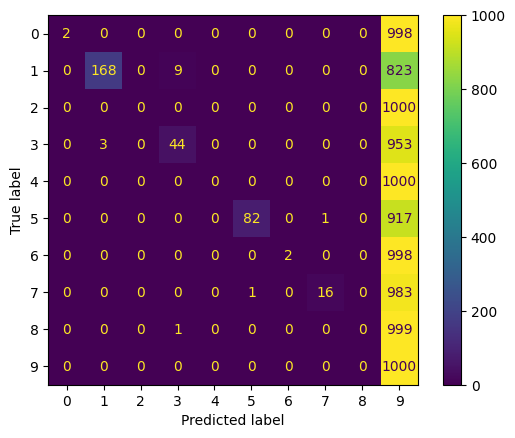

num_of_htables=17
entrySize=784
input_addr_length=44


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1872.24it/s]


Accuracy:   0.15
Total Training Execution Time: 28.61 seconds


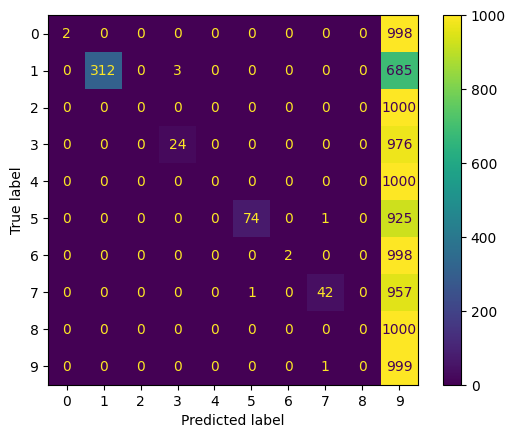

num_of_htables=17
entrySize=784
input_addr_length=46


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1838.38it/s]


Accuracy:   0.12
Total Training Execution Time: 29.81 seconds


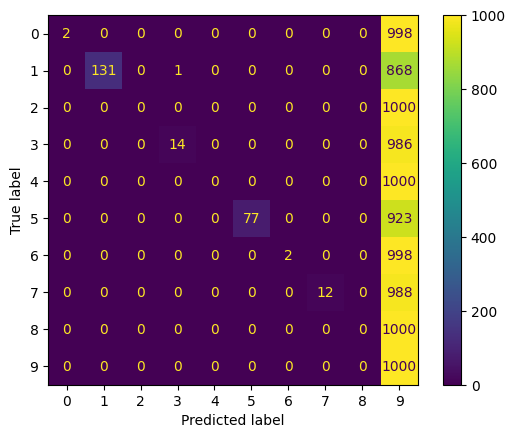

num_of_htables=16
entrySize=784
input_addr_length=48


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1872.35it/s]


Accuracy:   0.13
Total Training Execution Time: 29.09 seconds


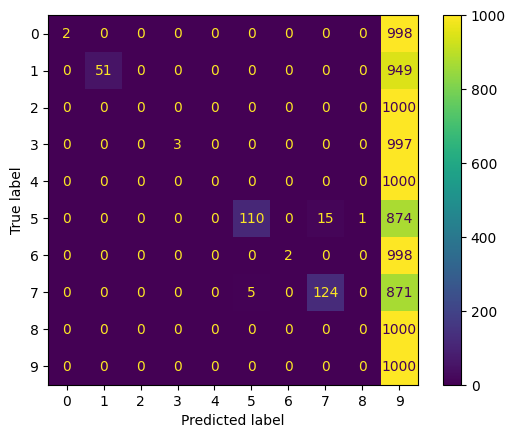

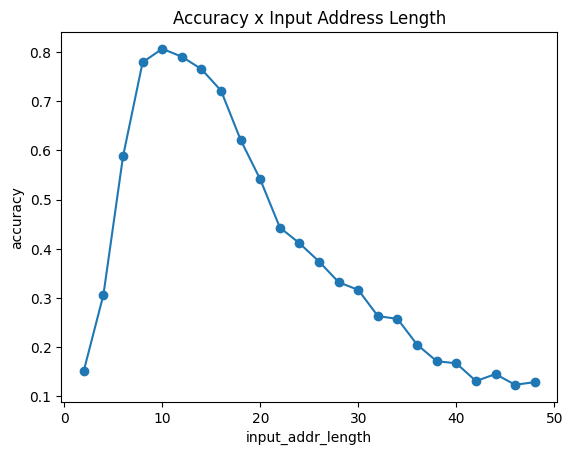

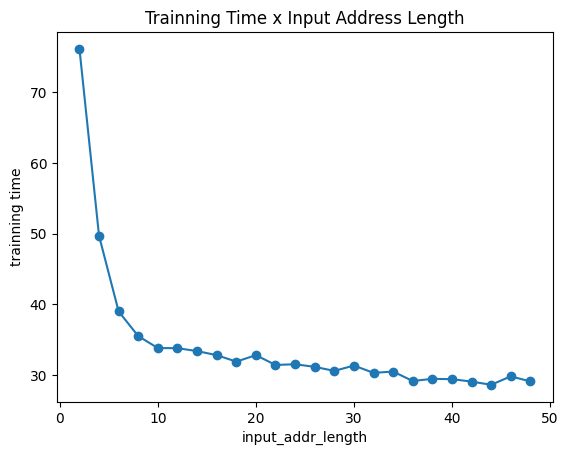

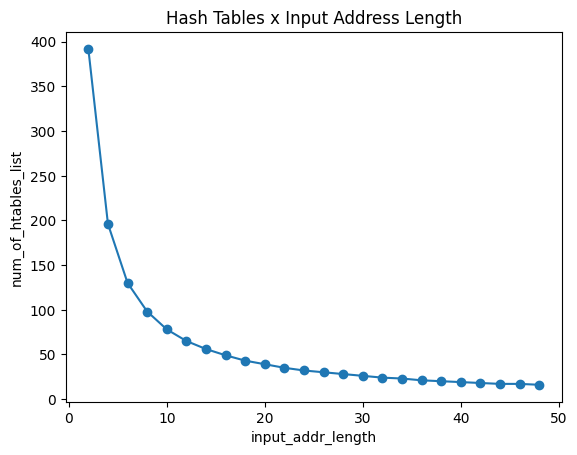

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2             392    0.1525       76.155173
                 4             196    0.3066       49.681007
                 6             130    0.5878       38.983837
                 8              98    0.7789       35.499875
                10              78    0.8063       33.808896
                12              65    0.7902       33.793005
                14              56    0.7650       33.378178
                16              49    0.7212       32.809582
                18              43    0.6211       31.891208
                20              39    0.5409       32.805089
                22              35    0.4432       31.418213
                24              32    0.4113       31.518698
                26              30    0.3741       31.149794
                28              28    0.3321       30.577693
                30              26    0.3165       31.333068
                32      

In [5]:

# Definir a lista de valores de addr
addr_list = list(range(2, 49, 2))
#addr_list = [8, 16, 24]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))